# Data Augmentation

O Data Augmentation é uma técnica fundamental na área de Aprendizado de Máquina e Inteligência Artificial que visa ampliar e diversificar conjuntos de dados para treinamento de modelos. É especialmente útil quando se dispõe de um conjunto de dados limitado, desbalanceado ou quando se busca melhorar a capacidade de generalização do modelo.


## O que é Data Augmentation?

Data Augmentation é o processo de criação de novos dados sintéticos a partir dos dados originais disponíveis. Envolve a aplicação de transformações ou manipulações nos dados existentes, preservando as informações essenciais, mas introduzindo variações e aumentando a diversidade.


## Por que usar Data Augmentation?

    Aumenta a quantidade de dados disponíveis para treinamento, o que é especialmente importante quando o conjunto de dados é pequeno.
    Melhora a capacidade de generalização do modelo, tornando-o mais robusto e capaz de lidar com dados de entrada não vistos anteriormente.
    Reduz o overfitting, que é o ajuste excessivo aos dados de treinamento, tornando o modelo menos sensível a ruídos e variações nos dados de entrada.

## Principais técnicas de Data Augmentation:

    Rotação: girar as imagens em diferentes ângulos.
    Espelhamento: inverter horizontalmente ou verticalmente as imagens.
    Translação: mover as imagens em diferentes direções.
    Zoom: ampliar ou reduzir o tamanho das imagens.
    Ruído: adicionar ruído aleatório às imagens.
    Corte e redimensionamento: recortar partes das imagens ou alterar suas dimensões.

## Exemplos de aplicações de Data Augmentation:

    Visão computacional: classificação de imagens, detecção de objetos, segmentação de imagens.
    Processamento de linguagem natural: geração de texto, tradução automática, resumo de texto.
    Áudio: reconhecimento de fala, análise de sentimentos em áudio.

In [ ]:
!pip install watermark sklearn==1.2.2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Carregar o conjunto de dados MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Redimensionar as imagens para o formato (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)


11490434/11490434 [==============================] - 0s 0us/step


## Método ImageDataGenerator

O método ImageDataGenerator é uma classe da biblioteca Keras que oferece funcionalidades para realizar Data Augmentation em conjuntos de dados de imagens durante o treinamento de modelos de aprendizado profundo. Ele simplifica o processo de aplicação de transformações nas imagens, permitindo ampliar e diversificar o conjunto de dados para melhorar o desempenho e a generalização dos modelos.

O ImageDataGenerator oferece uma variedade de parâmetros e opções para controlar as transformações aplicadas nas imagens. Alguns dos principais parâmetros incluem:

    rotation_range: define o intervalo de rotação em graus para aplicar rotações aleatórias nas imagens.
    width_shift_range e height_shift_range: especificam as faixas de deslocamento horizontal e vertical para aplicar deslocamentos aleatórios nas imagens.
    shear_range: controla a intensidade do cisalhamento (shear) aplicado nas imagens.
    zoom_range: determina a faixa de zoom aleatório para ampliar ou reduzir o tamanho das imagens.
    horizontal_flip e vertical_flip: habilitam o espelhamento horizontal e vertical das imagens, respectivamente.
    brightness_range: define a faixa de variação da luminosidade das imagens.
    preprocessing_function: permite especificar uma função personalizada para pré-processar as imagens antes da aplicação das transformações.

Após configurar o ImageDataGenerator com os parâmetros desejados, é possível ajustá-lo aos dados de treinamento usando o método fit. Esse processo de ajuste cria um gerador que gera lotes de imagens aumentadas durante o treinamento do modelo. O gerador pode ser utilizado em conjunto com a função flow ou flow_from_directory para fornecer os lotes de imagens aumentadas para o modelo.

O uso do ImageDataGenerator simplifica a aplicação de Data Augmentation, pois ele aplica as transformações em tempo real durante o treinamento, evitando a necessidade de pré-processar todas as imagens antes de iniciar o treinamento do modelo. Isso torna o processo mais eficiente e permite economizar recursos computacionais.

In [ ]:
# Criar um objeto ImageDataGenerator para realizar Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,       # Rotação aleatória de até 10 graus
    width_shift_range=0.1,   # Deslocamento horizontal aleatório de até 10% da largura
    height_shift_range=0.1,  # Deslocamento vertical aleatório de até 10% da altura
    shear_range=0.2,         # Cisalhamento aleatório
    zoom_range=0.2,          # Zoom aleatório
    horizontal_flip=True     # Espelhamento horizontal aleatório
)

# Ajustar o gerador aos dados de treinamento
datagen.fit(x_train)

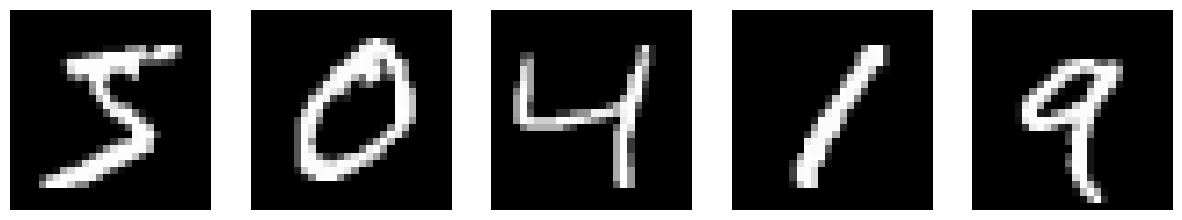

In [ ]:
# Exibir algumas imagens originais
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()


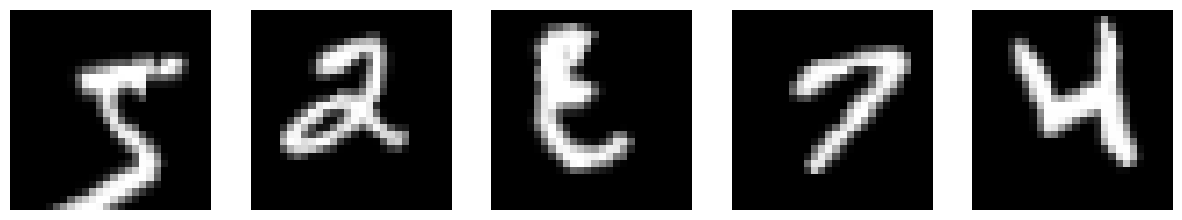

In [ ]:
# Gerar imagens aumentadas
augmented_images = datagen.flow(x_train, y_train, batch_size=5, shuffle=False)

# Exibir algumas imagens aumentadas
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    image = augmented_images.next()[0][0]
    ax.imshow(image.reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

## Para Casa

Aplique o Data Augmentation nos modelos já apresentados